In [1]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
# exercise 01

"""
Validating model performance

How do you ensure your model will perform well against test (unseen) data?

Select the answer that is false:
"""

# Instructions

"""
Perform K-fold cross-validation to tune hyperparameters during machine learning model training.


Use a bootstrapping method, where a subset of the data is selected with replacement, so that the output of averaged predictions produces a more accurate model from the reduction in variance.


Create a Random Forest using GridSearchCV to find the best hyperparameters and create a final model with them before evaluating on the test data.


Create a cross-validated Decision Tree model, then evaluate its performance on the test set.(Answer)
"""

# solution



#----------------------------------#

# Conclusion

"""
Not necessarily! A Decision Tree model is unfortunately a greedy algorithm, not guaranteed to return the optimal tree whether or not it's cross-validated. You're better off to combine cross-validation with a bootstrap method.
"""

"\nNot necessarily! A Decision Tree model is unfortunately a greedy algorithm, not guaranteed to return the optimal tree whether or not it's cross-validated. You're better off to combine cross-validation with a bootstrap method.\n"

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

loan_data = pd.read_csv(path_data+'loans_dti.csv')
loan_data.head()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_EducationalExpenses,Purpose_HomeImprovements,Purpose_HomePurchase,Purpose_MajorPurchase,Purpose_MedicalBills,Purpose_Moving,Purpose_Other,Purpose_RenewableEnergyPurchase,Purpose_Vacation,Purpose_Wedding
0,1,2.00,0.84,-0.48,0.84,0.29,0.18,-0.34,0.82,0.19,...,0,0,0,0,0,0,0,0,0,0
1,1,0.32,0.49,0.91,-1.97,0.77,1.79,-0.34,0.56,1.05,...,0,0,0,0,0,0,0,0,0,0
2,1,-1.06,1.10,-1.31,-1.46,-0.48,-0.83,-0.34,-0.70,-0.55,...,0,0,0,0,0,0,1,0,0,0
3,1,-0.87,-0.63,1.19,2.00,1.47,0.58,-0.34,-0.08,-0.22,...,0,1,0,0,0,0,0,0,0,0
4,0,1.06,-1.31,-0.20,0.07,1.53,-0.83,-0.34,-0.21,-0.38,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = loan_data.drop('Loan Status', axis=1)
y = loan_data['Loan Status']

In [8]:
# exercise 02

"""
Decision tree

In the last three chapters, you've learned a range of techniques that help you tackle many aspects of the machine learning interview. In this chapter, you'll be introduced to various ways to make sure any model you're asked to create or discuss in a machine learning interview is generalizable, evaluated correctly, and properly selected from among other possible models.

In this exercise, you will delve into hyperparameter tuning for a decision tree on the loan_data dataset. Here you'll tune min_samples_split, which is the minimum number of samples required to create an additional binary split, and max_depth, which is how deep you want to grow the tree. The deeper a tree, the more splits and therefore captures more information about the data.

The feature matrix X and the target label y have been imported for you.

Note that you're once again performing all of the steps in the machine learning pipeline!

Machine learning pipeline
"""

# Instructions

"""

    Import the correct function for a decision tree classifier and split the data into train and test sets.
    Instantiate a decision tree classifier, fit, predict, and print accuracy.
---
    Import the correct function to perform cross-validated grid search.
    Instantiate a decision tree classifier and use it with the parameter grid to perform a cross-validated grid-search.
    Fit and print model evaluation metrics

"""

# solution

# Import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_clf = DecisionTreeClassifier() 
loans_clf.fit(X_train, y_train)
y_pred = loans_clf.predict(X_test)

# Evaluation metric
print("Decision Tree Accuracy: {}".format(accuracy_score(y_test,y_pred)))

#----------------------------------#

# Import modules
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10]}

# Instantiate classifier and GridSearchCV, fit
loans_clf = DecisionTreeClassifier()
dtree_cv = GridSearchCV(loans_clf, param_grid=param_grid, cv=5)
fit = dtree_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(dtree_cv.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(dtree_cv.best_score_))

#----------------------------------#

# Conclusion

"""
Nice work! K-fold cross-validation improved the accuracy of a decision tree model by more than 10 percent!
"""

Decision Tree Accuracy: 0.6197333333333334
Tuned Decision Tree Parameter: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.7168857142857142


'\nNice work! K-fold cross-validation improved the accuracy of a decision tree model by more than 10 percent!\n'

In [9]:
# exercise 03

"""
A forest of decision trees

For this exercise, you'll practice using the bootstrapped Decision Tree, otherwise known as the Random Forest. As you did in the previous exercise, you'll then compare its accuracy to a model where you've tuned hyperparameters with cross-validation.

This time, you'll tune an additional hyperparameter, max_features, which lets your model decide how many features to use. When it is not set specifically, then it defaults to auto. Something to keep in mind for an interview is that Decision Trees consider all features by default, whereas Random Forests usually consider the square root of the number of features.

The feature matrix X, target label y, and train_test_split from sklearn.model_selection have been imported for you.
"""

# Instructions

"""

    Import the correct function for a random forest classifier and split the data into train and test sets.
    Instantiate a random forest classifier, fit, predict, and print accuracy.
---
    Import the correct function to perform cross-validated grid search.
    Perform the same steps, this time while performing cross-validated grid-search.

"""

# solution

# Import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_rf = RandomForestClassifier() 
loans_rf.fit(X_train, y_train)
y_pred = loans_rf.predict(X_test)

# Evaluation metric
print("Random Forest Accuracy: {}".format(accuracy_score(y_test,y_pred)))

#----------------------------------#

# Import modules
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10],"max_features": [10, 20, 30]}

# Instantiate classifier and GridSearchCV, fit
loans_rf = RandomForestClassifier(n_estimators=10)
rf_cv = GridSearchCV(loans_rf, param_grid=param_grid, cv=3)
fit = rf_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(rf_cv.best_score_))

#----------------------------------#

# Conclusion

"""
Great job! Although k-fold cross-validation did not improve a random forest model as much as it did for the decision tree, it had a 7 percent improvement over the baseline!
"""

Random Forest Accuracy: 0.7178666666666667
Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 20}
Tuned Random Forest Accuracy: 0.720114276277468


'\nGreat job! Although k-fold cross-validation did not improve a random forest model as much as it did for the decision tree, it had a 7 percent improvement over the baseline!\n'

In [10]:
# exercise 04

"""
X-ray weapon detection

You are given a dataset on detecting weapons at major US airports and have built a classification model with an accuracy of 99%. Why should you question the performance of the model? How should you proceed to ensure the model is indeed performing well?

Select the answer that is true:
"""

# Instructions

"""
When a dataset has imbalanced classes, a high recall score indicates a high number of false negatives, so continue to tune hyperparameters.


When a dataset has imbalanced classes, a low precision score indicates a high number of false positives, so consider trying different classification algorithms and/or resampling techniques to improve precision.(Answer)


When a dataset has imbalanced classes, a low f1 score indicates indicates a good balance between precision and recall, from which it is calculated, so nothing more is needed for model improvement.


When a dataset has imbalanced classes, a high accuracy score indicates the model will generalize well, so no adjustments need to be made to improve the model.
"""

# solution



#----------------------------------#

# Conclusion

"""
Indeed! A low precision score indicates that there are too many false positives, bringing the calculation down. Seeking to reduce the number of false positives to increase the precision can be accomplished with trying different classification algorithms and/or resampling techniques.
"""

'\nIndeed! A low precision score indicates that there are too many false positives, bringing the calculation down. Seeking to reduce the number of false positives to increase the precision can be accomplished with trying different classification algorithms and/or resampling techniques.\n'

In [11]:
# exercise 05

"""
Imbalanced class metrics

Class imbalance is something that can hamper your model's performance in any machine learning context. This is especially relevant in a machine learning interview if you are asked what to do if you are given a dataset with an imbalanced class, as some data is imbalanced by design such as insurance fraud data.

In this exercise you'll use sklearn to create a logistic regression model and print the confusion matrix along with several evaluation metrics to get a better understanding of how to interpret Machine Learning models from datasets that have a class imbalance.

Recall the class imbalance you saw previously in loan_data. The number of observations with Loan Status of Fully Paid far outweighs those that are Charged Off:

Class imbalance
"""

# Instructions

"""

    Import the necessary modules to create a logistic regression model as well as confusion matrix, accuracy, precision, recall, and F1-scores.
---

    Instantiate a logistic regression object, fit and predict.
---

    Print the confusion matrix and accuracy score.
---

    Print the precision, recall, and F1-scores.

"""

# solution

# Import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate, fit, predict
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("F1: {}".format(f1_score(y_test, y_pred)))

#----------------------------------#

# Conclusion

"""
Nice job! The metrics aren't actually too bad. Precision of 0.72 means there might be a high number of false positives than you really want to see. Let's see if you can improve them in the next exercise with some resampling techniques!
"""

Confusion matrix:
 [[  367  3868]
 [  318 10447]]
Accuracy: 0.7209333333333333
Precision: 0.7297939224589591
Recall: 0.9704598235020901
F1: 0.8330940988835726


"\nNice job! The metrics aren't actually too bad. Precision of 0.72 means there might be a high number of false positives than you really want to see. Let's see if you can improve them in the next exercise with some resampling techniques!\n"

In [14]:
train = pd.concat([X_train,y_train], axis=1)
deny = train[train['Loan Status'] == 0]
approve = train[train['Loan Status'] == 1]

In [15]:
# exercise 06

"""
Resampling techniques

In the last exercise, you saw how class imbalance can impact the results of your confusion matrix. In this exercise, you'll practice resampling techniques to explore the different results that alternative resampling styles can have on a dataset with class imbalance like that seen with loan_data. Using sklearn's resample() function, matching the number of rows in the majority class is called upsampling, while matching the number of rows in the minority class is called downsampling.

You will create both an upsampled and downsampled version of the loan_data dataset, apply a logistic regression on both of them and then evaluate your performance. The training data and its labels that correspond to deny are subset to contain only the minority class and to approve that correspond to the majority.

A train/test split testing object for making predictions has been saved to the workspace as X_test for your use in the exercises.
"""

# Instructions

"""

    Create an upsampled minority class the length of the majority class and concatenate (done for you).
    Create a downsampled majority class the length of the minority class and concatenate (done for you).
---
    Create an upsampled feature matrix and target array.
    Instantiate a logistic regression model object, fit, and predict with X_test.
    Print the evaluation metrics.
---
    Create a downsampled feature matrix and target array.
    Instantiate a logistic regression model object, fit, and predict with X_test.
    Print the evaluation metrics.

"""

# solution
from sklearn.utils import resample
# Upsample minority and combine with majority
loans_upsampled = resample(deny, replace=True, n_samples=len(approve), random_state=123)
upsampled = pd.concat([approve, loans_upsampled])

# Downsample majority and combine with minority
loans_downsampled = resample(approve, replace = False,  n_samples = len(deny), random_state = 123)
downsampled = pd.concat([loans_downsampled, deny])

#----------------------------------#

# Upsampled feature matrix and target array
X_train_up = upsampled.drop('Loan Status', axis=1)
y_train_up = upsampled['Loan Status']

# Instantiate, fit, predict
loan_lr_up = LogisticRegression(solver='liblinear')
loan_lr_up.fit(X_train_up, y_train_up)
upsampled_y_pred = loan_lr_up.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, upsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, upsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, upsampled_y_pred)))
print("Recall: {}".format(recall_score(y_test, upsampled_y_pred)))
print("F1: {}".format(f1_score(y_test, upsampled_y_pred)))

#----------------------------------#

# Downsampled feature matrix and target array
X_train_down = downsampled.drop('Loan Status', axis=1)
y_train_down = downsampled['Loan Status']

# Instantiate, fit, predict
loan_lr_down = LogisticRegression(solver='liblinear')
loan_lr_down.fit(X_train_down, y_train_down)
downsampled_y_pred = loan_lr_down.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, downsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, downsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, downsampled_y_pred)))
print("Recall: {}".format(recall_score(y_test, downsampled_y_pred)))
print("F1: {}".format(f1_score(y_test, downsampled_y_pred)))

#----------------------------------#

# Conclusion

"""
Amazing! Using both upsampling and downsampling techniques improved the precision score significantly, meaning there are less false positives. That is definitely a good thing!
"""

Confusion matrix:
 [[2327 1908]
 [3672 7093]]
Accuracy: 0.628
Precision: 0.7880235529385624
Recall: 0.658894565722248
F1: 0.7176970555499341
Confusion matrix:
 [[2324 1911]
 [3584 7181]]
Accuracy: 0.6336666666666667
Precision: 0.7898152221733392
Recall: 0.6670692057594054
F1: 0.7232713904416578


'\nAmazing! Using both upsampling and downsampling techniques improved the precision score significantly, meaning there are less false positives. That is definitely a good thing!\n'

In [16]:
# exercise 07

"""
Addressing multicollinearity

After careful exploratory data analysis, you realize that your baseline regression model suffers from multicollinearity. How would you check if that is true or not? Without losing any information, can you build a better baseline model?

Select the answer that is false:
"""

# Instructions

"""
Create a correlation matrix and/or heatmap, then engineer features to combine multicollinear independent variables, making sure to remove the individual features used to create any new features.


Create a correlation matrix and/or heatmap, then perform Ridge regression to penalize multicollinear independent variables and perform feature selection for modeling.


Create a correlation matrix and/or heatmap, then perform PCA to combine multicollinear independent variables as new principal components.


Create a correlation matrix and/or heatmap, then remove the multicollinear independent variables.(Answer)
"""

# solution



#----------------------------------#

# Conclusion

"""
Almost! While you can remove ONE of the variables when they show a high degree of correlation, you wouldn't want to remove all of them.
"""

"\nAlmost! While you can remove ONE of the variables when they show a high degree of correlation, you wouldn't want to remove all of them.\n"

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
diabetes = pd.read_csv(path_data+'diabetes.csv')

X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Coefficients: 
 [  10.45384922 -261.16601105  538.84541221  280.72544466 -855.21447839
  472.17305267  166.51881384  309.88763264  684.0489522   102.37723262]
Mean squared error: 2926.80
R_squared score: 0.51


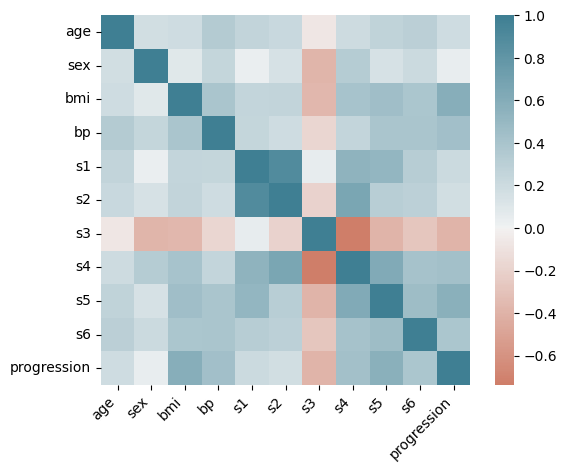

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

"\nThat's great! Now you know how to get metrics from your baseline model, how to explore relationships visually, and how to use feature engineering to reduce multicollinearity. You got the same R-squared score, but the MSE was slightly lower! Trying different combinations of feature engineering would likely continue to improve the model.\n"

In [20]:
# exercise 08

"""
Multicollinearity techniques - feature engineering

Multicollinearity is a common issue that might affect your performance in any machine learning context. Knowing how to discuss this small detail could take your explanation of modeling from good to great and really set you apart in an interview.

In this exercise, you'll practice creating a baseline model using Linear Regression on the diabetes dataset and explore some of the output metrics. Then you'll practice techniques to visually explore the correlation between the independent variables before finally perform feature engineering on 2 variables that are highly correlated.

For the first two steps, use X_train, X_test, y_train, and y_test which have been imported to your workspace.

Additionally, all relevant packages have been imported for you: pandas as pd, train_test_split from sklearn.model_selection, LinearRegression from sklearn.linear_model, mean_squared_error and r2_score from sklearn.metrics, matplotlib.pyplot as plt and seaborn as sns.
"""

# Instructions

"""

    Instantiate, fit, and predict a Linear Regression.
    Print the model coefficients, MSE, and r-squared.
---
    Create a correlation matrix, plot it to a heatmap.
    Print the matrix to explore the independent variable relationships.
---
    Engineer a new feature by combining s1 and s2 from diabetes, then remove them.
    Split your data into training and testing data with 30% test size and print the column names.
---
    Instantiate, fit, and predict a Linear Regression.
    Print the model coefficients, MSE, and r-squared.

"""

# solution

# Instantiate, fit, predict
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
y_pred = lin_mod.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lin_mod.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

#----------------------------------#

# Correlation matrix
diab_corr = diabetes.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corr, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corr)

#----------------------------------#

# Feature engineering
diabetes['s1_s2'] = diabetes['s1'] * diabetes['s2']
diabetes = diabetes.drop(['s1','s2'], axis=1)

# Print variable names
print(diabetes.columns)

# Train/test split
X2 = diabetes.drop('progression', axis=1)
y2 = diabetes['progression']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

#----------------------------------#

# Instantiate, fit, predict
lin_mod2 = LinearRegression()
lin_mod2.fit(X_train2, y_train2)
y_pred2 = lin_mod2.predict(X_test2)

# Coefficient estimates
print('Coefficients: \n', lin_mod2.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test2, y_pred2))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test2, y_pred2))

#----------------------------------#

# Conclusion

"""
That's great! Now you know how to get metrics from your baseline model, how to explore relationships visually, and how to use feature engineering to reduce multicollinearity. You got the same R-squared score, but the MSE was slightly lower! Trying different combinations of feature engineering would likely continue to improve the model.
"""

In [21]:
diabetes = pd.read_csv(path_data+'diabetes.csv')

X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Coefficients: 
 [  431.83041038  -293.77173602   253.57573406   568.70922969
   -67.51943277  -186.26488336    71.89012557    47.21891689
    93.98511769 -1130.48023791]
Mean squared error: 2926.80
Variance score: 0.51


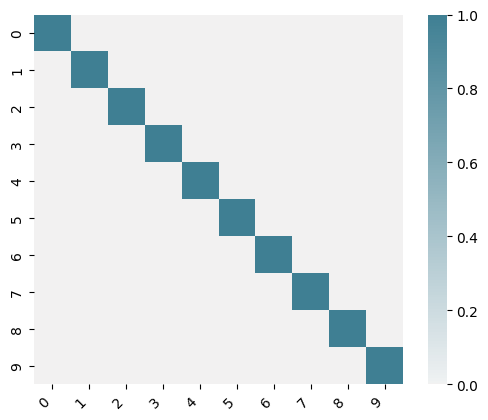

              0             1             2             3             4  \
0  1.000000e+00 -6.700378e-17  3.830167e-16 -4.969697e-18 -5.001632e-16   
1 -6.700378e-17  1.000000e+00 -3.489999e-16  1.467519e-17  5.213561e-16   
2  3.830167e-16 -3.489999e-16  1.000000e+00 -2.382251e-16 -1.880648e-16   
3 -4.969697e-18  1.467519e-17 -2.382251e-16  1.000000e+00  1.091299e-15   
4 -5.001632e-16  5.213561e-16 -1.880648e-16  1.091299e-15  1.000000e+00   
5 -1.111740e-16  4.502436e-16 -2.162073e-16 -1.641921e-17  3.627956e-16   
6 -3.030570e-16  4.853571e-16  5.693614e-17  2.280214e-16  3.169028e-16   
7  4.115512e-16  8.435845e-17 -9.755924e-17 -3.155859e-17 -1.521029e-16   
8  3.095395e-16  1.101857e-16 -1.255598e-16 -4.763529e-16  3.455301e-16   
9  4.262689e-15  4.345410e-15 -8.876019e-16  3.753690e-16  1.688105e-16   

              5             6             7             8             9  
0 -1.111740e-16 -3.030570e-16  4.115512e-16  3.095395e-16  4.262689e-15  
1  4.502436e-16  4.853571e

"\nFantastic! This simple change, although it didn't improve your metrics, removed all of the multicollinearity in the diabetes dataset!\n"

In [22]:
# exercise 09

"""
Multicollinearity techniques - PCA

In the last exercise you used feature engineering to combine the s1 and s2 independent variables as s1_s2 since they displayed the highest correlation in the diabetes dataset.

In this exercise, you'll perform PCA on diabetes to remove multicollinearity before you apply Linear Regression to it. Then, you'll compare the output metrics to those from the last exercise. Finally, you'll visualize what the correlation matrix and heatmap of the dataset looks like since PCA completely removes multicollinearity.
"""

# Instructions

"""

    Import the necessary modules to perform PCA.
    Instantiate and fit.
    Transform train and test separately.
---
    Instantiate, fit, and predict a Linear Regression to PCA transformed dataset.
    Print the model coefficients, MSE, and r-squared.
---
    Create a correlation matrix, plot it to a heatmap.
    Print the matrix to explore the independent variable relationships.

"""

# solution

# Import
from sklearn.decomposition import PCA

# Instantiate
pca = PCA()

# Fit on train
pca.fit(X_train)

# Transform train and test
X_trainPCA = pca.transform(X_train)
X_testPCA = pca.transform(X_test)

#----------------------------------#

# Import
from sklearn.linear_model import LinearRegression

# Instantiate, fit, predict
LinRegr = LinearRegression()
LinRegr.fit(X_trainPCA, y_train)
predictions = LinRegr.predict(X_testPCA)

# The coefficients
print('Coefficients: \n', LinRegr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

#----------------------------------#

# Correlation matrix
X_trainPCA = pd.DataFrame(X_trainPCA)
diab_corrPCA = X_trainPCA.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corrPCA, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corrPCA)

#----------------------------------#

# Conclusion

"""
Fantastic! This simple change, although it didn't improve your metrics, removed all of the multicollinearity in the diabetes dataset!
"""

In [23]:
# exercise 10

"""
Random forest vs gradient boosting

What are the main similarities and differences of Random Forest (RF) and Gradient Boosting (GB)algorithms?

Select the answer that is false:
"""

# Instructions

"""
Random Forest and Gradient Boosting machine learning techniques create multiple random samples that are used to produce a final prediction model.


Random Forest uses the bootstrapping method while Gradient Boosting uses weights given to incorrectly predicted observations from a previous sample applied to subsequent samples.


Random Forest and Gradient Boosting can use any algorithm, not just decision trees.(Answer)


The final prediction of Random Forest uses a decision tree and is an average of all generated bootstrap samples, while the final prediction of Gradient Boosting is a weighted average of the generated weak learners and can use any algorithm.
"""

# solution



#----------------------------------#

# Conclusion

"""
That's correct! While GB can use any algorithm, RF uses decision trees!
"""

"\nThat's correct! While GB can use any algorithm, RF uses decision trees!\n"

In [25]:
X = loan_data.drop('Loan Status', axis=1)
y = loan_data['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [26]:
# exercise 11

"""
Random forest ensemble

Questions about ensemble models are common in a machine learning interview. If you're provided with a dataset and asked to build a highly accurate model, you will likely want to consider these more complex models.

Your challenge in the remainder of this last lesson in the course is to create and compare two different ensemble models for loan_data.

In this exercise, you will create a Random Forest Classifier model and compare its performance metrics to the model in the next exercise.

The data has already been split is available in your workspace as X_train, X_test, y_train, and y_test.
"""

# Instructions

"""

    Import the modules to create a Random Forest model and create a confusion matrix, accuracy, precision, recall, and F1-scores.
    Instantiate a RF classifier and set the appropriate argument to generate 50 estimators.
---

    Fit the data to the instantiated Random Forest Classifier model object.
---

    Create predictions using the trained model object.
---

    Evaluate the model fit.

"""

# solution

# Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate, fit, predict
rf_model = RandomForestClassifier(n_estimators=50, random_state=123, oob_score = True)
rf_model = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Random Forest Accuracy: {}".format(accuracy_score(y_test, rf_pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, rf_pred)))
print("Precision: {}".format(precision_score(y_test, rf_pred)))
print("Recall: {}".format(recall_score(y_test, rf_pred)))
print("F1: {}".format(f1_score(y_test, rf_pred)))

#----------------------------------#

# Conclusion

"""
Amazing! Now you'll compare these metrics to a Gradient Boosting model in the next exercise!
"""

Random Forest Accuracy: 0.7154
Confusion matrix:
 [[  674  3561]
 [  708 10057]]
Precision: 0.7385078572477604
Recall: 0.9342313051555968
F1: 0.8249190009432802


"\nAmazing! Now you'll compare these metrics to a Gradient Boosting model in the next exercise!\n"

In [27]:
# exercise 12

"""
Gradient boosting ensemble

Boosting is a technique where the error of one predictor is passed as input to the next in a sequential manner. Gradient Boosting uses a gradient descent procedure to minimize the log loss for each subsequent classification tree added one at a time that, on their own, are weak decision models. Gradient Boosting for regression is similar, but uses a loss function such as mean squared error applied to gradient descent.

In this exercise, you will create a Gradient Boosting Classifier model and compare its performance to the Random Forest from the previous exercise, which had an accuracy score of 72.5%.

The loan_data DataFrame has already been split is available in your workspace as X_train, X_test, y_train, and y_test.
"""

# Instructions

"""

    Import the modules to create a Gradient Boosting model and print out the confusion matrix, accuracy, precision, recall, and F1-scores.
    Instantiate a GB classifier and set the appropriate argument to generate 50 estimators and with a learning rate of 0.01.
---

    Fit the data and create predictions.
---

    Evaluate the model fit by printing trained model evaluation metrics.
---
Question

Pick the ensemble model that had the best accuracy.
(RF)
"""

# solution

# Import
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate, fit, predict
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01,random_state=123)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Print evaluation metrics
print("Gradient Boosting Accuracy: {}".format(accuracy_score(y_test, gb_pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, gb_pred)))
print("Precision: {}".format(precision_score(y_test, gb_pred)))
print("Recall: {}".format(recall_score(y_test, gb_pred)))
print("F1: {}".format(f1_score(y_test, gb_pred)))

#----------------------------------#

# Conclusion

"""
Outstanding! You've learned how to effectively deal with missing data, avoid under or overfitting, apply transformations, among many other best practices in the step-by-step process of creating the best machine learning models. With continued practice, you will be able to ace your next Machine Learning Interview! Congratulations!
"""

Gradient Boosting Accuracy: 0.7176666666666667
Confusion matrix:
 [[    0  4235]
 [    0 10765]]
Precision: 0.7176666666666667
Recall: 1.0
F1: 0.8356297302542208


"\nOutstanding! You've learned how to effectively deal with missing data, avoid under or overfitting, apply transformations, among many other best practices in the step-by-step process of creating the best machine learning models. With continued practice, you will be able to ace your next Machine Learning Interview! Congratulations!\n"